# Store US Stock Prices in HDF5 Format

## Imports

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

## Load source data

In [3]:
stocks = pd.read_csv('us_stocks.csv')

In [9]:
stocks['date']

0           1999-11-18
1           1999-11-19
2           1999-11-22
3           1999-11-23
4           1999-11-24
               ...    
15389309    2018-03-21
15389310    2018-03-22
15389311    2018-03-23
15389312    2018-03-26
15389313    2018-03-27
Name: date, Length: 15389314, dtype: object

0          1999-11-18
1          1999-11-19
2          1999-11-22
3          1999-11-23
4          1999-11-24
              ...    
15389309   2018-03-21
15389310   2018-03-22
15389311   2018-03-23
15389312   2018-03-26
15389313   2018-03-27
Name: date, Length: 15389314, dtype: datetime64[ns]

## Apply required transformations

In [10]:
#Transform to datetime
stocks['date']=pd.to_datetime(stocks['date'])

In [27]:
#Select only stocks from 2000
stocks=stocks[stocks['date']>'01-01-2000']

In [28]:
#Set ticker and date as index
stocks.set_index(['ticker','date'],inplace=True)

In [29]:
#Drop not needed columns
stocks.drop(columns=['open','close','high','low','volume','ex-dividend','split_ratio'],inplace=True)

In [31]:
#Rename kept columns
stocks.rename(columns={'adj_open':'open','adj_high':'high','adj_low':'low','adj_close':'close','adj_volume':'volume'},inplace=True)

## Plot data

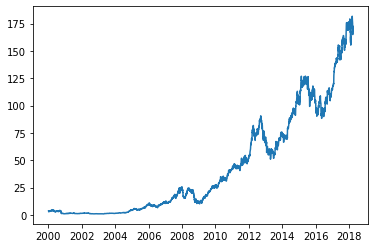

In [47]:
plt.plot(stocks.loc['AAPL','close'])

## Store in HDF5 format

In [33]:
stocks.to_hdf('stocks.h5',key='stocks')